In [1]:
import pandas as pd
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.compat.pandas import Appender
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller #Fuller test for stationary check
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
import datetime
from datetime import datetime, timedelta

In [57]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [2]:
se = pd.read_csv("socio_economic_all_counties_1995-2009.csv")
print("\nUnique Years: ", se.YEAR.nunique(), "\n", se.YEAR.unique())
se.head(5)


Unique Years:  14 
 [1995 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]


,YEAR,Areaname,STCOU,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
0,1995,UNITED STATES,0,34076,36424609,13.8,43369917
1,1995,ALABAMA,1000,27357,752097,17.6,730509
2,1995,"Autauga, AL",1001,34842,5471,13.4,7381
3,1995,"Baldwin, AL",1003,35014,15494,12.4,19384
4,1995,"Barbour, AL",1005,24423,6423,24.9,5111


In [3]:
sample = se[se['STCOU'] == 17019]
sample

,YEAR,Areaname,STCOU,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
619,1995,"Champaign, IL",17019,33947,18216,11.6,23624
3817,1997,"Champaign, IL",17019,38245,18901,12.1,23916
7015,1998,"Champaign, IL",17019,40519,17753,11.3,28132
10213,1999,"Champaign, IL",17019,38291,18670,11.2,28035
13411,2000,"Champaign, IL",17019,39603,19506,11.7,24193
16609,2001,"Champaign, IL",17019,39269,20039,11.9,24248
19807,2002,"Champaign, IL",17019,39337,22055,12.8,23995
23005,2003,"Champaign, IL",17019,39227,21419,12.6,23915
26203,2004,"Champaign, IL",17019,39914,22790,13.4,24031
29401,2005,"Champaign, IL",17019,40225,29800,17.7,24018


In [4]:
sample.drop(columns=['STCOU'], inplace = True)
sample

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,YEAR,Areaname,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
619,1995,"Champaign, IL",33947,18216,11.6,23624
3817,1997,"Champaign, IL",38245,18901,12.1,23916
7015,1998,"Champaign, IL",40519,17753,11.3,28132
10213,1999,"Champaign, IL",38291,18670,11.2,28035
13411,2000,"Champaign, IL",39603,19506,11.7,24193
16609,2001,"Champaign, IL",39269,20039,11.9,24248
19807,2002,"Champaign, IL",39337,22055,12.8,23995
23005,2003,"Champaign, IL",39227,21419,12.6,23915
26203,2004,"Champaign, IL",39914,22790,13.4,24031
29401,2005,"Champaign, IL",40225,29800,17.7,24018


In [6]:
sample.to_csv("Sample_Champaign.csv", index=False)

### Checking correlation between columns 

#### pearson : standard correlation coefficient

In [61]:
# To find the correlation among 
# the columns using pearson method 
    
sample.corr(method ='pearson') 

,YEAR,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
YEAR,1.000000,0.842522,0.923110,0.888476,-0.417483
Median_Household_Income,0.842522,1.000000,0.788841,0.769497,-0.145542
Poverty_number_of_people,0.923110,0.788841,1.000000,0.995290,-0.460395
Poverty_percent_of_people,0.888476,0.769497,0.995290,1.000000,-0.454015
Public_school_enrollment_Fall,-0.417483,-0.145542,-0.460395,-0.454015,1.000000


#### kendall : Kendall Tau correlation coefficient

In [62]:
# To find the correlation among 
# the columns using kendall method 
sample.corr(method ='kendall') 

,YEAR,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
YEAR,1.000000,0.670330,0.890110,0.780220,-0.406593
Median_Household_Income,0.670330,1.000000,0.604396,0.538462,-0.120879
Poverty_number_of_people,0.890110,0.604396,1.000000,0.890110,-0.428571
Poverty_percent_of_people,0.780220,0.538462,0.890110,1.000000,-0.450549
Public_school_enrollment_Fall,-0.406593,-0.120879,-0.428571,-0.450549,1.000000


#### spearman : Spearman rank correlation

In [63]:
# To find the correlation among 
# the columns using kendall method 
sample.corr(method ='spearman') 

,YEAR,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
YEAR,1.000000,0.810989,0.969231,0.912088,-0.463736
Median_Household_Income,0.810989,1.000000,0.736264,0.714286,-0.191209
Poverty_number_of_people,0.969231,0.736264,1.000000,0.969231,-0.547253
Poverty_percent_of_people,0.912088,0.714286,0.969231,1.000000,-0.604396
Public_school_enrollment_Fall,-0.463736,-0.191209,-0.547253,-0.604396,1.000000


In [64]:
sample = se[se['STCOU'] == 17019]
sample

,YEAR,Areaname,STCOU,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
619,1995,"Champaign, IL",17019,33947,18216,11.6,23624
3817,1997,"Champaign, IL",17019,38245,18901,12.1,23916
7015,1998,"Champaign, IL",17019,40519,17753,11.3,28132
10213,1999,"Champaign, IL",17019,38291,18670,11.2,28035
13411,2000,"Champaign, IL",17019,39603,19506,11.7,24193
16609,2001,"Champaign, IL",17019,39269,20039,11.9,24248
19807,2002,"Champaign, IL",17019,39337,22055,12.8,23995
23005,2003,"Champaign, IL",17019,39227,21419,12.6,23915
26203,2004,"Champaign, IL",17019,39914,22790,13.4,24031
29401,2005,"Champaign, IL",17019,40225,29800,17.7,24018


In [65]:
sample.drop(columns=['Areaname', 'STCOU','Poverty_number_of_people', 'Poverty_percent_of_people', 'Public_school_enrollment_Fall'], inplace = True)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 619 to 42193
Data columns (total 2 columns):
YEAR                       14 non-null int64
Median_Household_Income    14 non-null int64
dtypes: int64(2)
memory usage: 336.0 bytes


In [66]:
sample

,YEAR,Median_Household_Income
619,1995,33947
3817,1997,38245
7015,1998,40519
10213,1999,38291
13411,2000,39603
16609,2001,39269
19807,2002,39337
23005,2003,39227
26203,2004,39914
29401,2005,40225


In [67]:
sample['YEAR'] = pd.to_datetime(sample['YEAR'], format='%Y')
sample

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR,Median_Household_Income
619,1995-01-01,33947
3817,1997-01-01,38245
7015,1998-01-01,40519
10213,1999-01-01,38291
13411,2000-01-01,39603
16609,2001-01-01,39269
19807,2002-01-01,39337
23005,2003-01-01,39227
26203,2004-01-01,39914
29401,2005-01-01,40225


In [68]:
sample = sample.set_index('YEAR')
sample

,Median_Household_Income
YEAR,
1995-01-01,33947
1997-01-01,38245
1998-01-01,40519
1999-01-01,38291
2000-01-01,39603
2001-01-01,39269
2002-01-01,39337
2003-01-01,39227
2004-01-01,39914


In [69]:
#AdFuller test

result = adfuller(sample.Median_Household_Income.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.474319
p-value: 0.984071


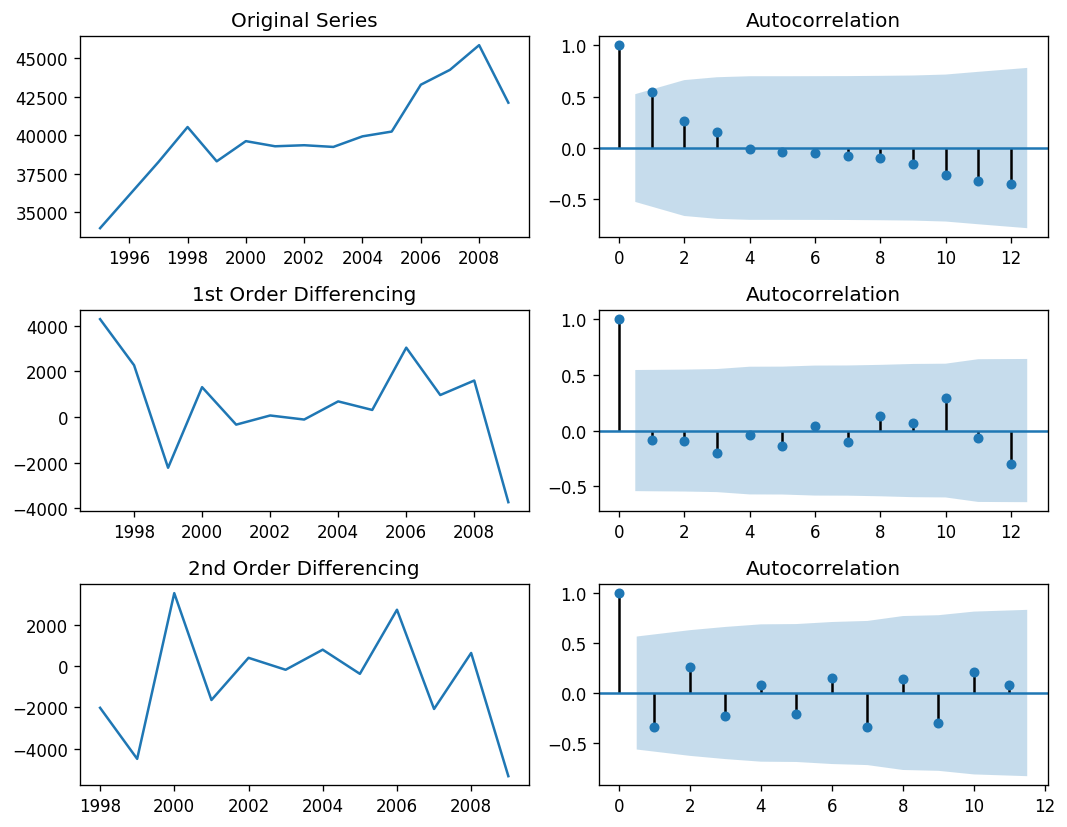

In [70]:
# Original Series
fig, axes = plt.subplots(3, 2) #sharex=True - This causes errors
axes[0, 0].plot(sample.Median_Household_Income); axes[0, 0].set_title('Original Series')
plot_acf(sample.Median_Household_Income, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sample.Median_Household_Income.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sample.Median_Household_Income.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sample.Median_Household_Income.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sample.Median_Household_Income.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

### We see from the graphs that, d=1 

In [71]:
y = sample.Median_Household_Income
y

YEAR
1995-01-01    33947
1997-01-01    38245
1998-01-01    40519
1999-01-01    38291
2000-01-01    39603
2001-01-01    39269
2002-01-01    39337
2003-01-01    39227
2004-01-01    39914
2005-01-01    40225
2006-01-01    43271
2007-01-01    44237
2008-01-01    45840
2009-01-01    42101
Name: Median_Household_Income, dtype: int64

In [72]:
## Adf Test
ndiffs(y, test='adf')  

2

In [73]:
# KPSS test
ndiffs(y, test='kpss') 

1

In [74]:
# PP test:
ndiffs(y, test='pp')  

2

In [75]:
#### d=0

model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=261.848, BIC=264.404, Time=0.059 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=266.097, BIC=267.375, Time=0.005 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=260.899, BIC=262.816, Time=0.034 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=261.864, BIC=263.781, Time=0.037 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=338.705, BIC=339.344, Time=0.007 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=262.796, BIC=265.352, Time=0.044 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=263.049, BIC=266.245, Time=0.088 seconds
Near non-invertible roots for order (2, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.278 seconds
                               SARIMAX Results                                
Dep. Variable:   

In [76]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [77]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


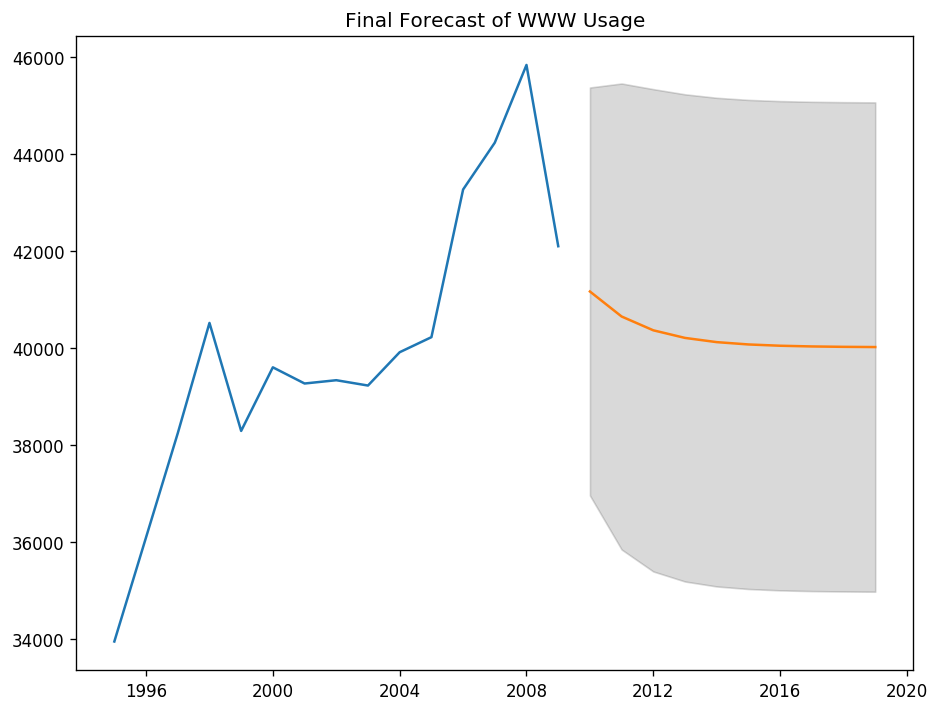

In [78]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

### With kpss test

In [79]:
model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=240.739, BIC=242.999, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=238.683, BIC=239.813, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=237.174, BIC=238.869, Time=0.015 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=237.814, BIC=239.509, Time=0.012 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=237.888, BIC=238.453, Time=0.007 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=239.637, BIC=241.897, Time=0.015 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=234.446, BIC=237.271, Time=0.103 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Total fit time: 0.250 seconds
                               SARIMAX Results                                
Dep. Variable:   

In [80]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [81]:
fc_series

2010-01-01    41166.865393
2011-01-01    40651.148550
2012-01-01    40366.431702
2013-01-01    40209.245282
2014-01-01    40122.465836
2015-01-01    40074.556657
2016-01-01    40048.106967
2017-01-01    40033.504628
2018-01-01    40025.442971
2019-01-01    40020.992294
dtype: float64

In [82]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


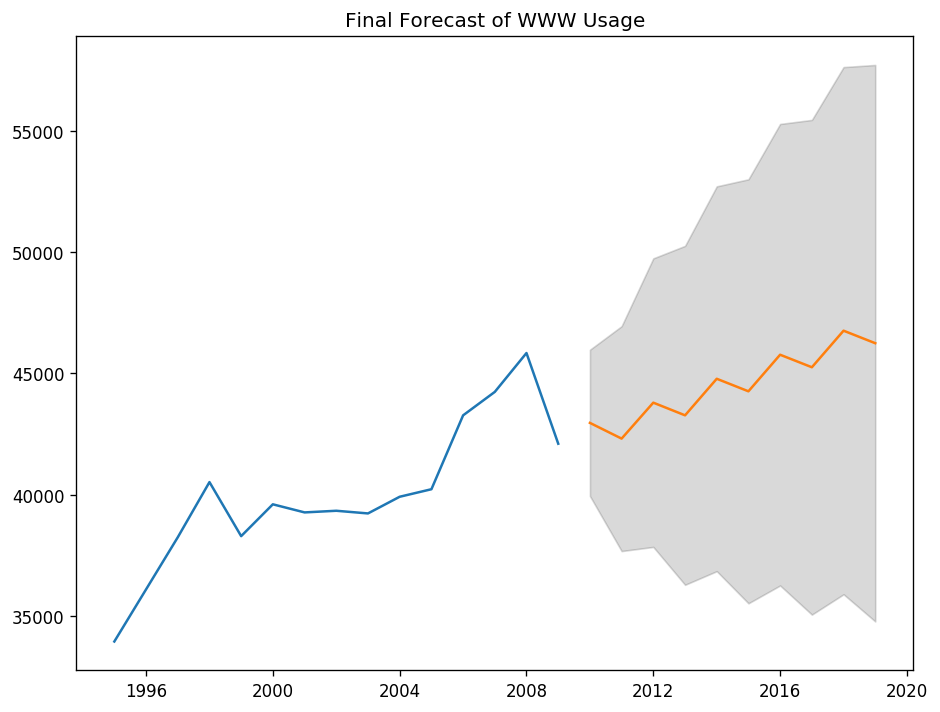

In [83]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

### With ADF test

In [84]:
model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=223.536, BIC=225.476, Time=0.128 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=225.981, BIC=226.951, Time=0.006 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=227.978, BIC=229.433, Time=0.033 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=228.343, BIC=229.798, Time=0.015 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=224.806, BIC=225.291, Time=0.007 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=222.136, BIC=224.561, Time=0.064 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=230.792, BIC=232.731, Time=0.024 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=224.902, BIC=227.812, Time=0.048 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=225.032, BIC=227.942, Time=0.058 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=223.774, BIC=226.199, Time=0.040 seco

In [85]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [86]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


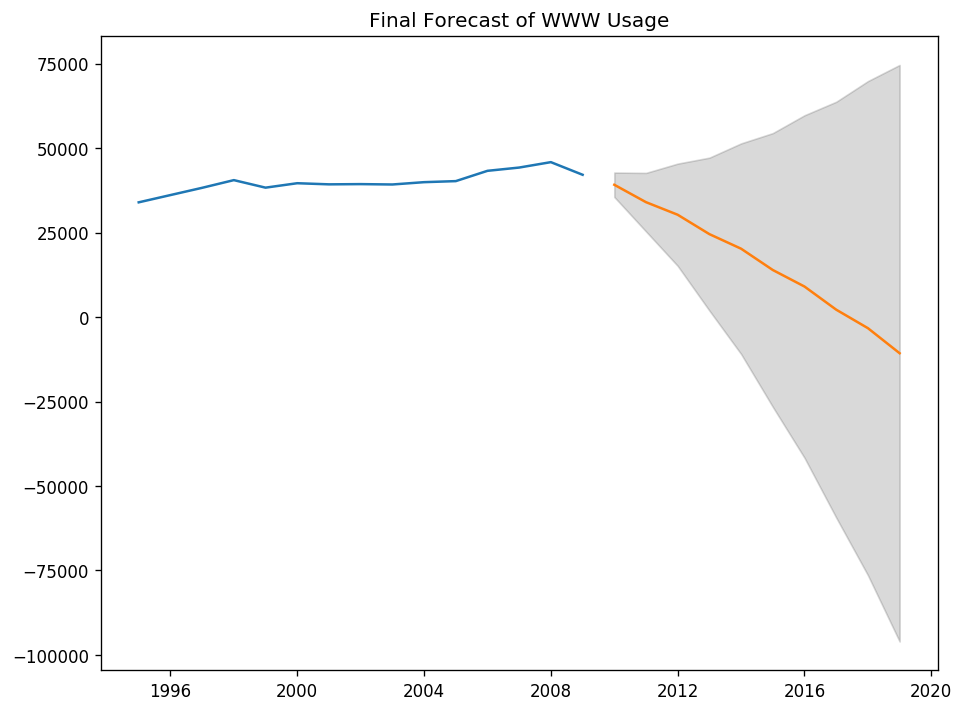

In [87]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

## SARIMA

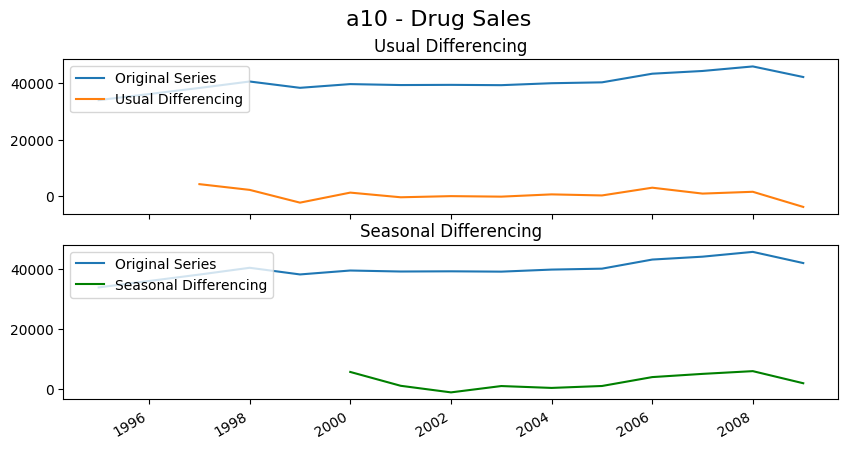

In [88]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

fig.autofmt_xdate()

# Usual Differencing
axes[0].plot(sample[:], label='Original Series')
axes[0].plot(sample[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(sample[:], label='Original Series')
axes[1].plot(sample[:].diff(4), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)

plt.show()

We see there are no seasonal properties to the data, so we cannot use SARIMA

### Sample 2

In [89]:
sample = se[se['STCOU'] == 4013]
sample

,YEAR,Areaname,STCOU,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
107,1995,"Maricopa, AZ",4013,37583,362298,13.8,402596
3305,1997,"Maricopa, AZ",4013,40134,355924,12.7,421798
6503,1998,"Maricopa, AZ",4013,42192,344304,12.0,461260
9701,1999,"Maricopa, AZ",4013,44054,323288,10.7,476219
12899,2000,"Maricopa, AZ",4013,47024,322120,10.2,502835
16097,2001,"Maricopa, AZ",4013,45921,362057,11.1,508817
19295,2002,"Maricopa, AZ",4013,46038,400631,11.9,534697
22493,2003,"Maricopa, AZ",4013,46322,443793,12.8,567038
25691,2004,"Maricopa, AZ",4013,48304,479545,13.3,627113
28889,2005,"Maricopa, AZ",4013,48752,450439,12.6,652927


In [90]:
sample.drop(columns=['Areaname', 'STCOU','Poverty_number_of_people', 'Poverty_percent_of_people', 'Public_school_enrollment_Fall'], inplace = True)
print(sample.info())
sample


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 107 to 41681
Data columns (total 2 columns):
YEAR                       14 non-null int64
Median_Household_Income    14 non-null int64
dtypes: int64(2)
memory usage: 336.0 bytes
None


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,YEAR,Median_Household_Income
107,1995,37583
3305,1997,40134
6503,1998,42192
9701,1999,44054
12899,2000,47024
16097,2001,45921
19295,2002,46038
22493,2003,46322
25691,2004,48304
28889,2005,48752


In [91]:
sample['YEAR'] = pd.to_datetime(sample['YEAR'], format='%Y')
sample = sample.set_index('YEAR')
sample

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Median_Household_Income
YEAR,
1995-01-01,37583
1997-01-01,40134
1998-01-01,42192
1999-01-01,44054
2000-01-01,47024
2001-01-01,45921
2002-01-01,46038
2003-01-01,46322
2004-01-01,48304


In [92]:
#AdFuller test

result = adfuller(sample.Median_Household_Income.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.154227
p-value: 0.000011


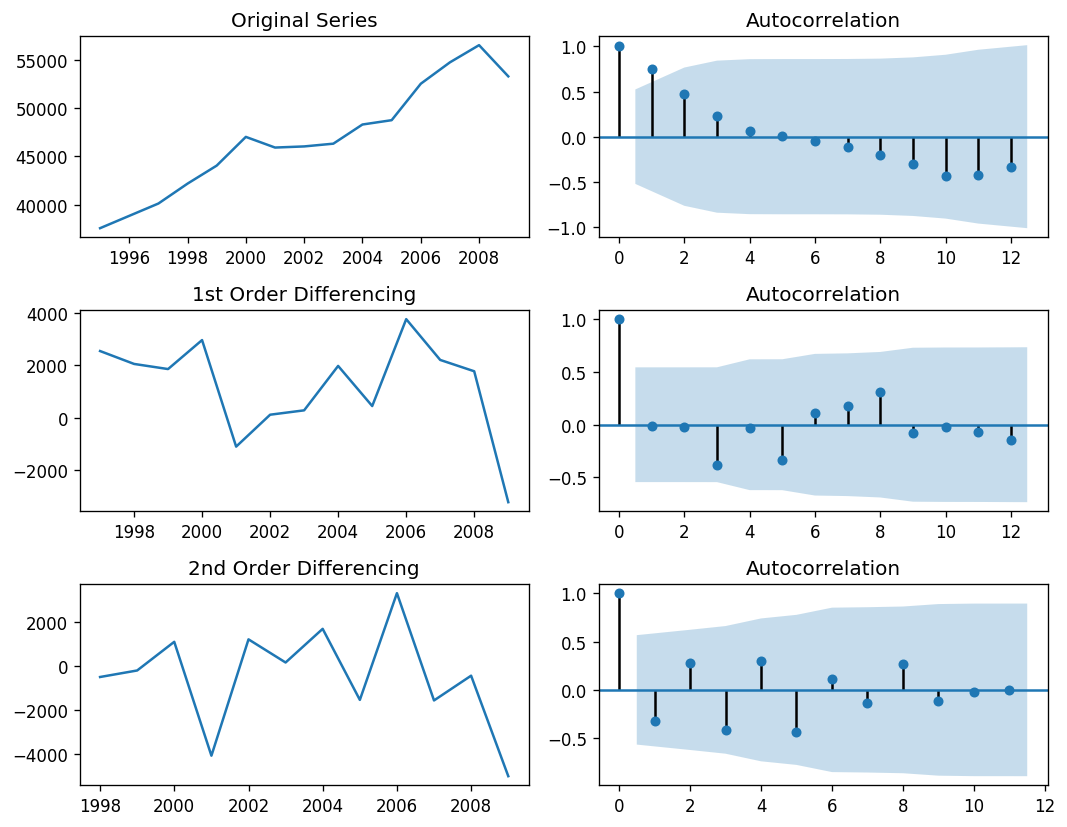

In [93]:
# Original Series
fig, axes = plt.subplots(3, 2) #sharex=True - This causes errors
axes[0, 0].plot(sample.Median_Household_Income); axes[0, 0].set_title('Original Series')
plot_acf(sample.Median_Household_Income, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sample.Median_Household_Income.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sample.Median_Household_Income.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sample.Median_Household_Income.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sample.Median_Household_Income.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

In [94]:
y = sample.Median_Household_Income
y

YEAR
1995-01-01    37583
1997-01-01    40134
1998-01-01    42192
1999-01-01    44054
2000-01-01    47024
2001-01-01    45921
2002-01-01    46038
2003-01-01    46322
2004-01-01    48304
2005-01-01    48752
2006-01-01    52522
2007-01-01    54733
2008-01-01    56511
2009-01-01    53284
Name: Median_Household_Income, dtype: int64

In [40]:
## Adf Test
ndiffs(y, test='adf')  

2

In [41]:
## Adf Test
ndiffs(y, test='kpss')  

1

In [42]:
## Adf Test
ndiffs(y, test='pp')  

2

In [95]:
model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=237.100, BIC=239.360, Time=0.107 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=235.796, BIC=236.926, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=237.246, BIC=238.940, Time=0.021 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=237.660, BIC=239.355, Time=0.012 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=238.623, BIC=239.187, Time=0.006 seconds
Total fit time: 0.155 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -115.898
Date:                Sun, 12 Apr 2020   AIC                            235.796
Time:                        18:33:32   BIC                            236.926
Sample:                             0   HQIC       

In [44]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [45]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


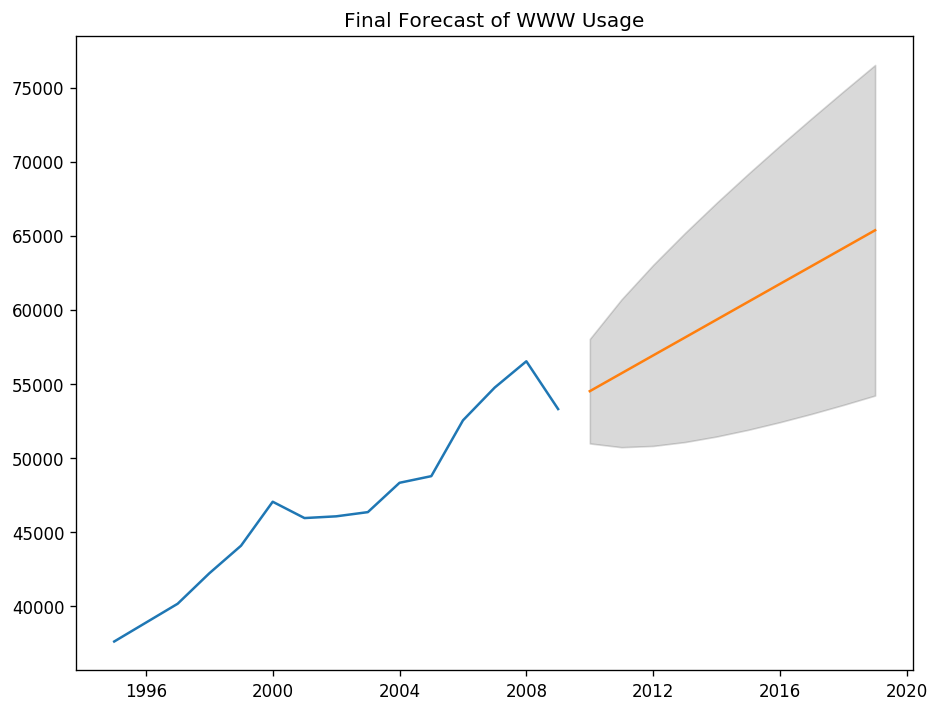

In [46]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [47]:
#ADF

model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=220.028, BIC=221.968, Time=0.093 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=223.307, BIC=224.277, Time=0.006 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=225.230, BIC=226.685, Time=0.011 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=225.377, BIC=226.832, Time=0.015 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=221.848, BIC=222.332, Time=0.008 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=230.502, BIC=232.926, Time=0.034 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=244.450, BIC=246.874, Time=0.059 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=227.737, BIC=229.677, Time=0.019 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0,

In [48]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [49]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


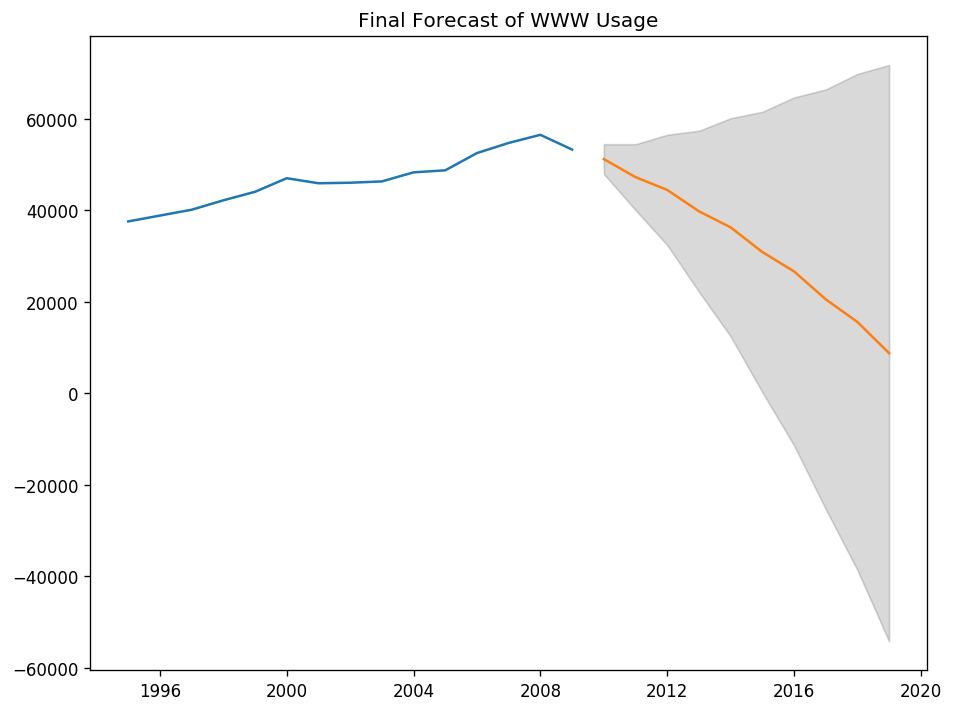

In [50]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [51]:
## d=0

model = pm.auto_arima(sample.Median_Household_Income, start_p=1, start_q=1,       
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=264.356, BIC=266.912, Time=0.050 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=283.838, BIC=285.116, Time=0.008 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=262.975, BIC=264.893, Time=0.056 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=274.367, BIC=276.284, Time=0.027 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=343.353, BIC=343.992, Time=0.005 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=262.084, BIC=264.640, Time=0.045 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=262.909, BIC=266.104, Time=0.042 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=264.136, BIC=267.331, Time=0.074 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=263.227, BIC=267.062, Time=0.078 seconds
Total fit time: 0.389 seconds
                               SARIMAX Results                

In [52]:
# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', 
                        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'], dtype='datetime64')
index_of_fc

array(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01'], dtype='datetime64[D]')

In [53]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


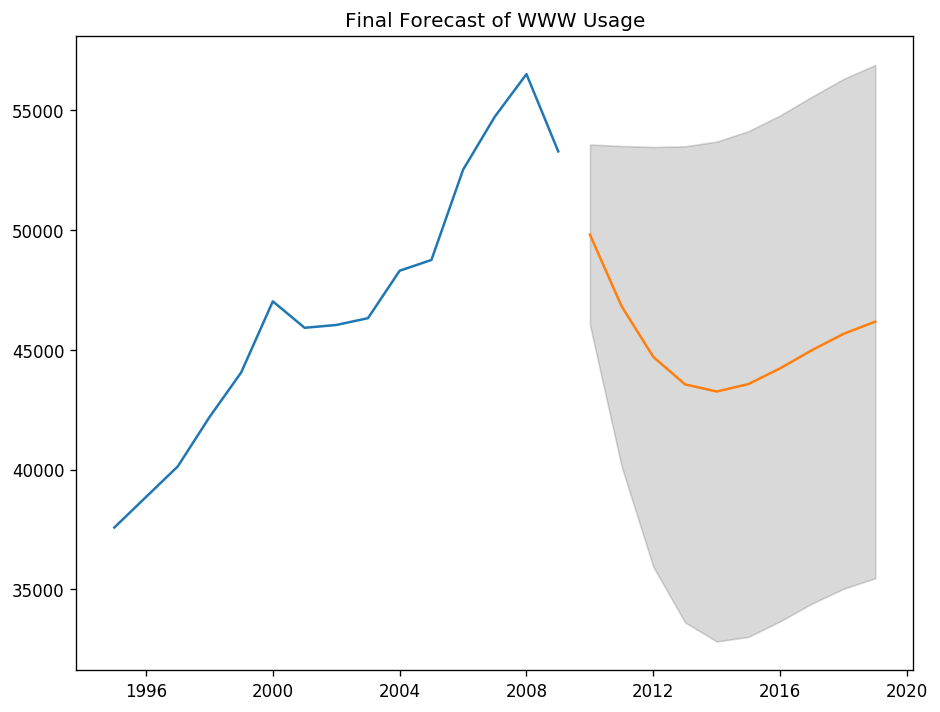

In [54]:
# Plot
plt.plot(sample.Median_Household_Income)

plt.plot(fc_series)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()